In [40]:
import scanpy as sc

In [41]:
sc.settings.figdir = '../figures'

In [42]:
adata = sc.read_h5ad("../data/annotated_adata.h5ad")

In [43]:
adata.obs['cell_type']

AAACCTGAGGCTATCT_4861STDY7082734     CD4_Th0
AAACCTGAGTCATCCA_4861STDY7082734    CD4_Th17
AAACCTGAGTCTCCTC_4861STDY7082734    CD4_Th17
AAACCTGCAAACGTGG_4861STDY7082734    CD4_Th17
AAACCTGCACGGCGTT_4861STDY7082734    CD4_Th17
                                      ...   
TTTGTCAAGCTGCCCA-1_RLN-5            memory_b
TTTGTCAAGTCGTACT-1_RLN-5             naive_b
TTTGTCACATGATCCA-1_RLN-5            memory_b
TTTGTCAGTCAGATAA-1_RLN-5             naive_b
TTTGTCAGTGAACCTT-1_RLN-5             naive_b
Name: cell_type, Length: 243753, dtype: category
Categories (31, object): ['naive_b', 'memory_b', 'dark_zone_b', 'proliferating_b', ..., 'fibroblast', 'lymphatic_endothelium', 'fenestrated_endothelium', 'nonfenestrated_endothelium']

In [44]:
adata = adata[adata.obs['cell_type'].isin(["cDC2", "activated_DC", "cDC1", "plasmacytoid_DC", "macrophage", "classical_monocyte", "mast"])]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [45]:
adata

View of AnnData object with n_obs × n_vars = 2727 × 25295
    obs: 'empty_drops', 'dd', 'channel', 'disease', 'anatomy', 'centre', 'donor', 'tenx_run', 'cell_selection', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'qc_cuts', 'scrublet_scores', 'scrublet_cuts', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'stress_genes', 'qc_filtering_clusters', 'leiden', 'leiden_R', 'cell_type'
    var: 'ID', 'Symbol', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'core_exclude', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: '_scvi', 'cell_selection_colors', 'centre_colors', 'channel_colors

In [30]:
sc.pp.neighbors(adata, use_rep = "X_scVI", n_neighbors = 50)

In [31]:
sc.tl.umap(adata)

In [35]:
disease_control = {
     'HDLR': 'cHL',
     'HDMC': 'cHL',
     'HDNLP': 'cHL',
     'HDNS': 'cHL',
     'healthy': 'healthy',
    'reactive_lymph_node': 'healthy'
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['disease_state'] = adata.obs['disease'].map(disease_control).astype('category')


In [36]:
adata.obs['disease']

AAACCTGCATACTCTT_4861STDY7082734                healthy
AAACGGGTCGCCGTGA_4861STDY7082734                healthy
AAAGATGGTCTCCATC_4861STDY7082734                healthy
AAAGTAGCATTCCTGC_4861STDY7082734                healthy
AACTGGTCAATCCGAT_4861STDY7082734                healthy
                                           ...         
GGGAATGGTCGAGATG-1_RLN-5            reactive_lymph_node
TAAACCGTCCTATGTT-1_RLN-5            reactive_lymph_node
TCATTACTCCTCCTAG-1_RLN-5            reactive_lymph_node
TCGTACCGTATATGGA-1_RLN-5            reactive_lymph_node
TTCCCAGTCCGAGCCA-1_RLN-5            reactive_lymph_node
Name: disease, Length: 2727, dtype: category
Categories (6, object): ['HDLR', 'HDMC', 'HDNLP', 'HDNS', 'healthy', 'reactive_lymph_node']

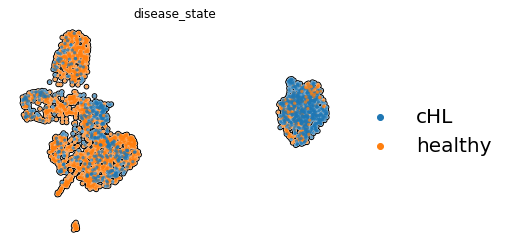

In [39]:
sc.pl.umap(adata, color = ['disease_state'], add_outline=True,
           legend_fontsize = 20, frameon=False, save='myeloid_umap_disease_state.pdf')

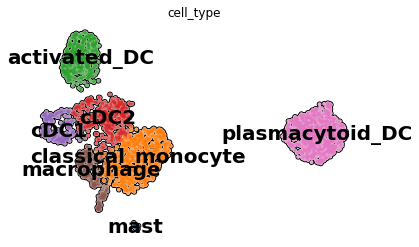

In [9]:
sc.pl.umap(adata, color = ['cell_type'], add_outline=True,
          legend_loc = 'on data', legend_fontsize = 20, frameon=False, save= 'myeloid_umap.pdf')

categories: mast, classical_monocyte, activated_DC, etc.
var_group_labels: pan, mast, pDC, etc.


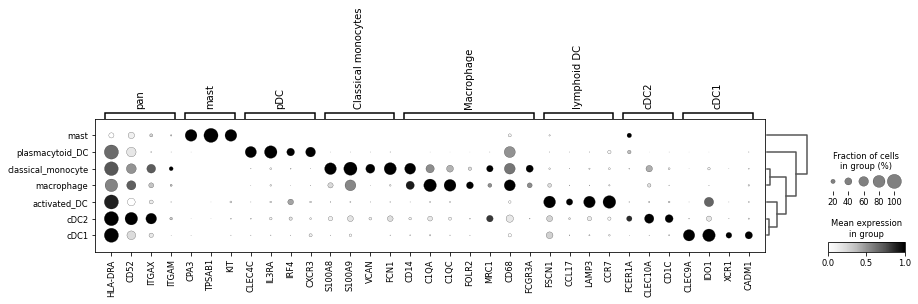

In [9]:
#plot markers
myeloid_genes_dict = {
    'pan': ['HLA-DRA', 'CD52', 'ITGAX', 'ITGAM'],
    'mast': ['CPA3', 'TPSAB1', 'KIT'],
    'pDC': ['CLEC4C', 'IL3RA', 'IRF4', 'CXCR3'],
        'Classical monocytes' : ['S100A8', 'S100A9', 'VCAN', 'FCN1'],
        'Macrophage' : ['CD14','C1QA', 'C1QC', 'FOLR2', 'MRC1', 'CD68', 'FCGR3A'],
        'lymphoid DC' : ['FSCN1', 'CCL17', 'LAMP3', 'CCR7'],
    'cDC2' : ['FCER1A', 'CLEC10A', 'CD1C'],
                       'cDC1' : ['CLEC9A', 'IDO1', 'XCR1', 'CADM1'],
                      }

sc.pl.dotplot(adata, myeloid_genes_dict, groupby = ['cell_type'], dendrogram=True, gene_symbols='Symbol', 
                  cmap = 'Greys', standard_scale='var', save= 'myeloid_markers.pdf')



In [11]:
adata.write_h5ad("../data/myeloid_compartment.h5ad")